Ported from tybalt/preprocess_data.ipynb script November 27, 2018

# Processing all datasets to be used in downstream analyses

RNAseq data was uploaded to DL102 from a variety of projects downloaded from IDseq. Clinical data was curated from various metadata on taken from appropriate projects.

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline

## Define Input and Output Filenames

In [6]:
# Input Files
rna_file = os.path.join('Data', '10x_genecounts.csv') 

In [7]:
# Output Files
# Processing RNAseq data by z-score and zeroone norm
#rna_out_file = os.path.join('Data', '10x_rnaseq.tsv.gz')
#rna_out_file = os.path.join('Data', 'rsv_human_counts.norm.scale.csv.gz')
rna_out_file = os.path.join('Data', 'cd14_human_counts.norm.scale.csv.gz')
#rna_out_zeroone_file = os.path.join('Data', '10x_scaled_zeroone_rnaseq.tsv.gz')
#rna_out_zeroone_file = os.path.join('Data', 'rsv_human_counts.norm.scale.csv.gz')
rna_out_zeroone_file = os.path.join('Data', 'cd14_human_counts.norm.scale.csv.gz')

## Load Data

In [8]:
rnaseq_df = pd.read_table(rna_file, sep=',', index_col=0)
rnaseq_df.head()

,ACAAGAGAACTACG-1,GGATGTTGTACTTC-1,CACTAACTAGAGAT-1,GGAGCGCTCCATAG-1,TAAGGGCTACACGT-1,GCCCAACTAGCTAC-1,ACTCAGGATGCTAG-1,TACAATGAGGGACA-1,GATTTGCTTCTTCA-1,TAGGAGCTTATTCC-1,...,TAGTCACTAGCGTT-1,CCTTAATGTATGCG-1,TGTAATGATGGCAT-1,ACGTCCTGCTAGAC-1,CTATAAGACAATCG-1,TAGAGCACTCAGGT-1,GTGTACGAGTTAGC-1,GTGTGATGTGTTCT-1,TAGCATCTACAGTC-1,AGAGCGGAGGAACG-1
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Begin processing different data types

### RNAseq

Perform basic QC on the RNA-seq data - filtering out samples with very low total counts (likely little input RNA) and genes with low prevalence.

In [9]:
# remove ERCCss
#patternDel = "ERCC"
#filter = rnaseq_df.index.str.contains(patternDel)
#rnaseq_df = rnaseq_df[~filter] 

In [10]:
per_sample_counts = np.log10(rnaseq_df.sum() + 1)

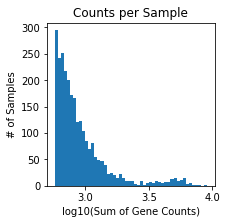

In [11]:
plt.figure(figsize=(3,3))
plt.hist(per_sample_counts, bins=50)  # sum per sample
plt.title("Counts per Sample")#, without ERCC")
plt.xlabel("log10(Sum of Gene Counts)")
plt.ylabel("# of Samples")
plt.show()

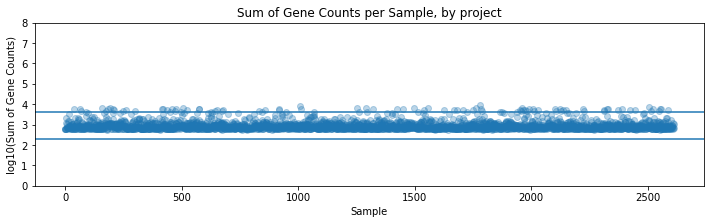

In [12]:
plt.figure(figsize = (12, 3))
plt.scatter([i for i in range(len(per_sample_counts))], per_sample_counts, alpha = .3)
plt.ylim(0,8)
plt.title("Sum of Gene Counts per Sample, by project")
plt.ylabel("log10(Sum of Gene Counts)")
plt.xlabel("Sample")
plt.axhline(y=per_sample_counts.describe()['mean'] - 3*per_sample_counts.describe()['std'])
plt.axhline(y=per_sample_counts.describe()['mean'] + 3*per_sample_counts.describe()['std'])
plt.show()

In [13]:
# Remove SAMPLES with < 3 std of the mean total counts
print(rnaseq_df.shape)
threshold = per_sample_counts.describe()['mean'] - 3*per_sample_counts.describe()['std']
samples_to_keep = list(per_sample_counts[per_sample_counts > threshold].index)
rnaseq_df = rnaseq_df[samples_to_keep]
print(rnaseq_df.shape)

(32738, 2612)
(32738, 2612)


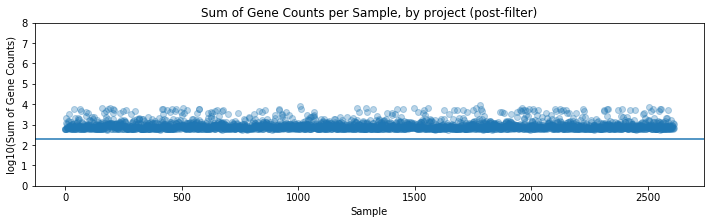

In [14]:
per_sample_counts = np.log10(rnaseq_df.sum() + 1)

plt.figure(figsize = (12, 3))
plt.scatter([i for i in range(len(per_sample_counts))], per_sample_counts, alpha = .3)
plt.ylim(0,8)
plt.title("Sum of Gene Counts per Sample, by project (post-filter)")
plt.ylabel("log10(Sum of Gene Counts)")
plt.xlabel("Sample")
plt.axhline(y=threshold)
plt.show()

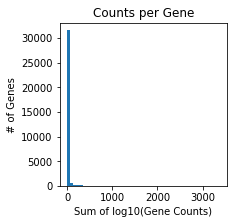

In [15]:
per_gene_counts = np.log10(rnaseq_df + 1).sum(axis=1)
plt.figure(figsize=(3,3))
plt.hist(per_gene_counts, bins=50)  # sum per sample
plt.title("Counts per Gene")
plt.xlabel("Sum of log10(Gene Counts)")
plt.ylabel("# of Genes")
plt.show()

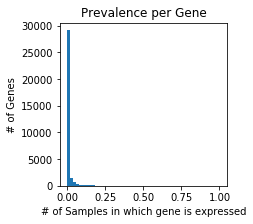

In [16]:
per_gene_prevalence = (rnaseq_df > 0).sum(axis=1)/(rnaseq_df.shape)[1]
plt.figure(figsize=(3,3))
plt.hist(per_gene_prevalence, bins=50)  # sum per sample
plt.title("Prevalence per Gene")
plt.xlabel("# of Samples in which gene is expressed")
plt.ylabel("# of Genes")
plt.show()

In [17]:
per_gene_prevalence.describe()

count    32738.000000
mean         0.014037
std          0.068250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003828
max          1.000000
dtype: float64

In [18]:
print(rnaseq_df.shape)
prevalence_threshold = per_gene_prevalence.describe()['50%']
genes_to_keep = list(per_gene_prevalence[per_gene_prevalence > prevalence_threshold].index)
rnaseq_df = rnaseq_df.loc[genes_to_keep]
print(rnaseq_df.shape)

(32738, 2612)
(14242, 2612)


In [19]:
# Process RNAseq file
#rnaseq_df.index = rnaseq_df.index.map(lambda x: x.split('|')[0])
#rnaseq_df.columns = rnaseq_df.columns.str.slice(start=0, stop=15)

# Gene is listed twice in RNAseq data, drop both occurrences
#rnaseq_df.drop('SLC35E2', axis=0, inplace=True)
rnaseq_df = np.log10(rnaseq_df.T + 1)

# Determine most variably expressed genes and subset
num_mad_genes = 5000
mad_genes = rnaseq_df.mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
rnaseq_subset_df = rnaseq_df.loc[:, top_mad_genes]

In [20]:
mad_genes.head(20) # verify 1. these are gene names, 2. relative functional relevance via ToppGene

HLA-DRA     0.339354
HLA-DPB1    0.327955
CD74        0.316496
HLA-DRB1    0.291904
HLA-DPA1    0.285491
LYZ         0.285149
ACTB        0.281603
HLA-DRB5    0.277243
S100A8      0.273677
CST3        0.270993
B2M         0.266654
RPS3A       0.266104
RPL15       0.265335
GNB2L1      0.265018
RPS5        0.264042
RPL29       0.263752
HLA-DQA1    0.262288
GAPDH       0.261124
S100A9      0.259948
PFN1        0.256764
dtype: float64

In [21]:
rnaseq_subset_df.fillna(0, inplace=True)

/data/katrina/anaconda3/envs/tybalt/lib/python3.5/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [22]:
# MAY WANT TO DO SOME OTHER NORMALIZATION HERE.

In [23]:
# Scale RNAseq data using z-scores
rnaseq_scaled_df = preprocessing.StandardScaler().fit_transform(rnaseq_subset_df)
rnaseq_scaled_df = pd.DataFrame(rnaseq_scaled_df,
                                columns=rnaseq_subset_df.columns,
                                index=rnaseq_subset_df.index)
rnaseq_scaled_df.to_csv(rna_out_file, sep='\t', compression='gzip')

# Scale RNAseq data using zero-one normalization
rnaseq_scaled_zeroone_df = preprocessing.MinMaxScaler().fit_transform(rnaseq_subset_df)
rnaseq_scaled_zeroone_df = pd.DataFrame(rnaseq_scaled_zeroone_df,
                                        columns=rnaseq_subset_df.columns,
                                        index=rnaseq_subset_df.index)
rnaseq_scaled_zeroone_df.to_csv(rna_out_zeroone_file, sep='\t', compression='gzip')

In [24]:
# check if the flu genes are included in the top mad genes
[i for i in mad_genes.index if 'flu' in i]

[]